In [1]:
import torch
from dataset_class import dataset,params2theta,theta2params
import pandas as pd
from matplotlib import pyplot as plt


In [2]:
def load_dataset(filename,Nmax=10**10,remove_zeros=True,cutoff=50):
    df=pd.read_csv(filename)[:Nmax]
    cts,dils = df['Counts'].to_numpy(),df['Dilution'].to_numpy().astype(float)
    if remove_zeros:
        cts,dils = cts[cts!=0],dils[cts!=0]
    return dataset(cts,dils,cutoff)

In [3]:
data = load_dataset('synth_data/synth_unimodal.csv',Nmax=1000,cutoff=-1)
th_gt = params2theta(*torch.tensor((8000,500,1.)))

In [4]:
data.evaluate(components=1)

3.3344175801120177 -3321.830575789523 -12.510568608327098


(tensor([7942.5142], device='cuda:0', dtype=torch.float64),
 tensor([455.9470], device='cuda:0', dtype=torch.float64),
 tensor([1.], device='cuda:0', dtype=torch.float64))

In [5]:
data.make_plot('graphs/synth/unimodal.png',th_gt)

In [ ]:
del data.lpkdil_n
del data

In [ ]:
data2 = load_dataset('synth_data/synth_multimodal_harder.csv',Nmax=1000,cutoff=-1)
th_gt = params2theta(*torch.tensor(((4000,8000,14000),
                                   (200,1500,1000),
                                   (.25,.4,.35))))


In [ ]:
data2.loglike(th_gt.to(data2.device),th_gt.size(0)//3).sum()

tensor(-4346.6662, device='cuda:0', dtype=torch.float64)

In [ ]:
data2.evaluate()

4.573596986093861 -4345.166759235976 -227.82542717261572
4.508914075510506 -4346.165383122808 -162.64389098835298


(tensor([13983.3351,  8142.7536,  4069.4508,  8049.2653,  8021.2471, 13807.8547,
         13759.4422,  4048.3786,  7739.4279, 13488.8389, 13579.4576,  4091.3759,
          6134.8523,  3948.8179,  3983.5148,  4664.1118,  3812.2555,  3622.6908,
          3495.4052,  3973.9114,  8971.6021], device='cuda:0',
        dtype=torch.float64),
 tensor([1139.3625, 1022.6856,  425.5586,  920.2361, 1084.4362, 1343.8232,
         1351.1094,  435.7845,  973.0952, 1497.0542, 1388.3480,  553.5959,
         1070.1757,  534.5755,  621.6382, 1177.1031,  613.5757,  577.4743,
          533.5704, 1140.5956, 1949.1156], device='cuda:0', dtype=torch.float64),
 tensor([0.1514, 0.1128, 0.0906, 0.0894, 0.0784, 0.0728, 0.0641, 0.0635, 0.0473,
         0.0423, 0.0374, 0.0368, 0.0241, 0.0206, 0.0170, 0.0136, 0.0114, 0.0088,
         0.0073, 0.0052, 0.0052], device='cuda:0', dtype=torch.float64))

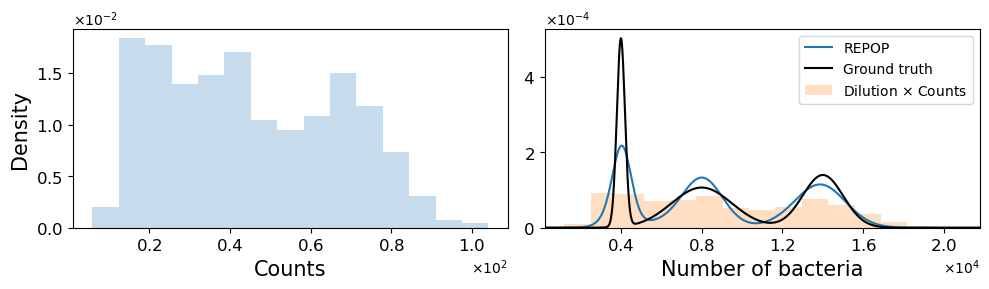

In [ ]:
data2.make_plot('graphs/synth/multimodal_harder.png'.format(th_gt.numpy()),th_gt,bins=15)

In [ ]:
del data2.lpkdil_n
del data2